In [1]:
import chess
import chess.pgn
from stockfish import Stockfish

In [2]:
#change '\' to '/'
stockfish=Stockfish('C:/Users/Administrator/Desktop/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe')

In [3]:
#pgn files
pgn_file=open(r'C:\Users\Administrator\Desktop\2023\Nepomniachtchi, Ian_vs_Ding, Liren_2023.04.09.pgn')

In [4]:
game=chess.pgn.read_game(pgn_file)

In [5]:
board=chess.Board()
move_scores=[]
stockfish.set_depth(20)

In [6]:
for move in game.mainline_moves():
    board.push(move)#更新前面空的borad的状态
    stockfish.set_position(board.fen())
    score=stockfish.get_evaluation()#拿到分数
    move_scores.append((move,score))#生成一个类似坐标，用于画点

In [7]:
print(move_scores)

[(Move.from_uci('e2e4'), {'type': 'cp', 'value': 23}), (Move.from_uci('e7e5'), {'type': 'cp', 'value': 32}), (Move.from_uci('g1f3'), {'type': 'cp', 'value': 34}), (Move.from_uci('b8c6'), {'type': 'cp', 'value': 25}), (Move.from_uci('f1b5'), {'type': 'cp', 'value': 35}), (Move.from_uci('a7a6'), {'type': 'cp', 'value': 26}), (Move.from_uci('b5a4'), {'type': 'cp', 'value': 35}), (Move.from_uci('g8f6'), {'type': 'cp', 'value': 26}), (Move.from_uci('e1g1'), {'type': 'cp', 'value': 26}), (Move.from_uci('f8e7'), {'type': 'cp', 'value': 35}), (Move.from_uci('a4c6'), {'type': 'cp', 'value': 25}), (Move.from_uci('d7c6'), {'type': 'cp', 'value': 25}), (Move.from_uci('f1e1'), {'type': 'cp', 'value': 25}), (Move.from_uci('f6d7'), {'type': 'cp', 'value': 34}), (Move.from_uci('d2d4'), {'type': 'cp', 'value': 34}), (Move.from_uci('e5d4'), {'type': 'cp', 'value': 32}), (Move.from_uci('d1d4'), {'type': 'cp', 'value': 32}), (Move.from_uci('e8g8'), {'type': 'cp', 'value': 34}), (Move.from_uci('c1f4'), {'t

In [8]:
for move,score in move_scores:
    print(f'Move action:{move},Score:{score}')

Move action:e2e4,Score:{'type': 'cp', 'value': 23}
Move action:e7e5,Score:{'type': 'cp', 'value': 32}
Move action:g1f3,Score:{'type': 'cp', 'value': 34}
Move action:b8c6,Score:{'type': 'cp', 'value': 25}
Move action:f1b5,Score:{'type': 'cp', 'value': 35}
Move action:a7a6,Score:{'type': 'cp', 'value': 26}
Move action:b5a4,Score:{'type': 'cp', 'value': 35}
Move action:g8f6,Score:{'type': 'cp', 'value': 26}
Move action:e1g1,Score:{'type': 'cp', 'value': 26}
Move action:f8e7,Score:{'type': 'cp', 'value': 35}
Move action:a4c6,Score:{'type': 'cp', 'value': 25}
Move action:d7c6,Score:{'type': 'cp', 'value': 25}
Move action:f1e1,Score:{'type': 'cp', 'value': 25}
Move action:f6d7,Score:{'type': 'cp', 'value': 34}
Move action:d2d4,Score:{'type': 'cp', 'value': 34}
Move action:e5d4,Score:{'type': 'cp', 'value': 32}
Move action:d1d4,Score:{'type': 'cp', 'value': 32}
Move action:e8g8,Score:{'type': 'cp', 'value': 34}
Move action:c1f4,Score:{'type': 'cp', 'value': 34}
Move action:d7c5,Score:{'type':

In [9]:
board=chess.Board()
move_scores=[]
stockfish.set_depth(40)

In [ ]:
for move in game.mainline_moves():
    board.push(move)  # 更新棋盘
    stockfish.set_position(board.fen())  # 将棋盘状态传给Stockfish
    eval_result=stockfish.get_evaluation() # 获取当前评分，但是是一个dict
    score=eval_result['value']/100 #除以100是为了标准化分数
    move_scores.append((board.fullmove_number, score))  # 保存每步棋的评分（步骤编号，评分）

In [1]:
steps=[step[0] for step in move_scores]
scores=[step[1] for step in move_scores]

NameError: name 'move_scores' is not defined

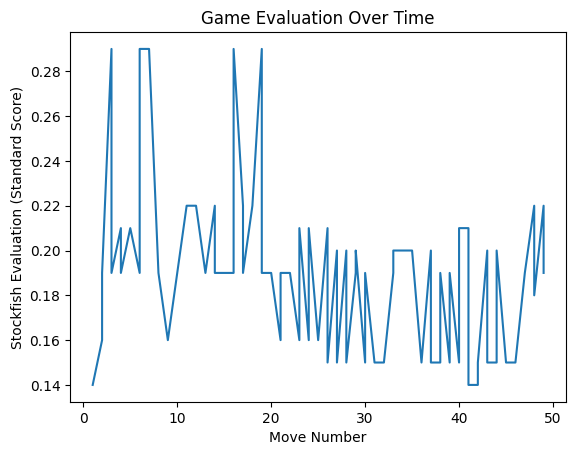

In [58]:
plt.plot(steps, scores)
plt.xlabel('Move Number')
plt.ylabel('Stockfish Evaluation (Standard Score)')
plt.title('Game Evaluation Over Time')

plt.show()

In [52]:

pgn_file = open(r'C:\Users\Administrator\Desktop\2023\Nepomniachtchi, Ian_vs_Ding, Liren_2023.04.09.pgn')

# 读取游戏
game = chess.pgn.read_game(pgn_file)

# 计算游戏中的步数
move_count = 0
while game:
    # 统计该游戏中的所有步数
    for move in game.mainline_moves():
        move_count += 1
    break  # 只处理第一场棋局，因为通常一个PGN文件可以包含多个棋局

print(f"Total number of moves: {move_count}")


Total number of moves: 97


In [86]:
import chess#https://github.com/niklasf/python-chess
from stockfish import Stockfish

#We'll create an intentionally worse stockfish engine to estimate complexity of positions
stockfish_good=Stockfish("C:/Users/Administrator/Desktop/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish_good.set_depth(20)#How deep the AI looks
stockfish_good.set_skill_level(20)#Highest rank stockfish
stockfish_bad=Stockfish("C:/Users/Administrator/Desktop/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish_bad.set_depth(3)
stockfish_bad.set_skill_level(3)

In [87]:
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
!pip install tqdm
import tqdm
import zipfile

In [88]:
rows=[]
pgn_file=open(r'C:\Users\Administrator\Desktop\2023\Nepomniachtchi, Ian_vs_Ding, Liren_2023.04.18.pgn')
game = chess.pgn.read_game(pgn_file)
row={}
row['moves']=[x.uci() for x in game.mainline_moves()]
rows.append(row)
games=pd.DataFrame(rows)
games

,moves
0,"[e2e4, e7e6, d2d4, d7d5, b1d2, c7c5, g1f3, c5d..."


In [89]:
games.to_csv("loaded_games.csv",index=False)

In [97]:
games=pd.read_csv("loaded_games.csv")
games

,moves
0,"['e2e4', 'e7e6', 'd2d4', 'd7d5', 'b1d2', 'c7c5..."


In [98]:
#Convert moves from string into list of move strings 

#Try not to run eval unless you really need to and are sure the text comes from a trusted source
games['moves'] = games['moves'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [99]:
#If you get an error on this import be sure to run pip install ftfy==6.1.1. This was added to requirements.txt recently
!pip install ftfy
import ftfy
ftfy.fix_encoding("GrÃ¼nfeld Defense: Exchange Variation")

'Grünfeld Defense: Exchange Variation'

In [100]:
#Standard point values for different pieces. Lowercase is white piece and uppercase is black
piece_scores={
    "p": 1,
    "P": -1,
    "r": 5,
    "R": -5,
    "n": 3,
    "N": -3,
    "b": 3,
    "B": -3,
    "q": 9,
    "Q": -9
}

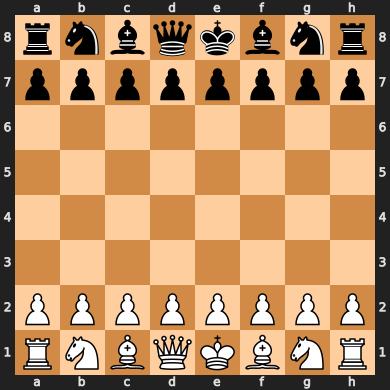

In [101]:
#Play a game up to move number

move_number=5
row={}
row['taken']=[]
board=chess.Board()

board

In [102]:
import random

#Used by chessnit.com
def build_stored_game_analysis(game, move_number):
    row={}
    row['move_number']=move_number
    row['taken']=[]
    board=chess.Board()
    for san in game['moves'][:move_number]:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            row['taken'].append(taken.__str__())
        move=board.push_san(san)
    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row
row=build_stored_game_analysis(game, 20)
row

KeyError: 'moves'

In [103]:
rows=[]
for move_number in tqdm.tqdm(range(1,20+1)):
    rows.append(build_stored_game_analysis(game, move_number))
moves=pd.DataFrame(rows).set_index("move_number")
moves

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]


KeyError: 'moves'

In [154]:
import chess#https://github.com/niklasf/python-chess
from stockfish import Stockfish

#We'll create an intentionally worse stockfish engine to estimate complexity of positions
stockfish_good=Stockfish("C:/Users/Administrator/Desktop/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish_good.set_depth(20)#How deep the AI looks
stockfish_good.set_skill_level(20)#Highest rank stockfish
stockfish_bad=Stockfish("C:/Users/Administrator/Desktop/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish_bad.set_depth(3)
stockfish_bad.set_skill_level(3)

In [155]:
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
import tqdm
import zipfile

In [156]:
NUM_GAMES=366392   #from https://database.nikonoel.fr/ Not necessary but helpful to get tqdm to give estimate
rows=[]
pgn=open(r'C:\Users\Administrator\Desktop\2023\加赛\Nepomniachtchi, Ian_vs_Ding, Liren_2023.04.30.pgn')
row={}
game = chess.pgn.read_game(pgn)
row['moves']=[x.uci() for x in game.mainline_moves()]
rows.append(row)
games=pd.DataFrame(rows)
games

,moves
0,"[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f..."


In [157]:
#Save as CSV for easy, faster access
games.to_csv("loaded_games.csv",index=False)

In [158]:
games=pd.read_csv("loaded_games.csv")
games

,moves
0,"['e2e4', 'e7e5', 'g1f3', 'b8c6', 'f1b5', 'a7a6..."


In [159]:
#Convert moves from string into list of move strings 

#Try not to run eval unless you really need to and are sure the text comes from a trusted source
games['moves']=games['moves'].apply(lambda x: eval(x))

In [160]:
game=games.iloc[0]

In [161]:
#If you get an error on this import be sure to run pip install ftfy==6.1.1. This was added to requirements.txt recently
import ftfy
ftfy.fix_encoding("GrÃ¼nfeld Defense: Exchange Variation")

'Grünfeld Defense: Exchange Variation'

In [162]:
#Standard point values for different pieces. Lowercase is white piece and uppercase is black
piece_scores={
    "p": 1,
    "P": -1,
    "r": 5,
    "R": -5,
    "n": 3,
    "N": -3,
    "b": 3,
    "B": -3,
    "q": 9,
    "Q": -9
}

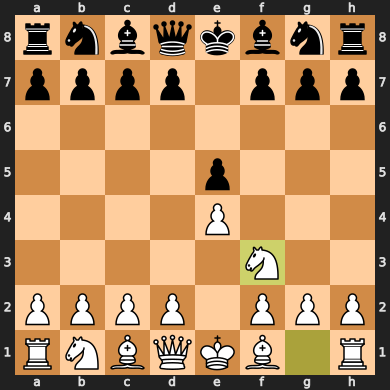

In [163]:
#Play a game up to move number

move_number=3
row={}
row['taken']=[]
board=chess.Board()
for san in game['moves'][:move_number]:
    parsed_san=board.parse_san(san)#move by the san "Standard Algebraic Notation"
    taken=board.piece_at(parsed_san.to_square)
    if taken:
        row['taken'].append(taken.__str__())
    move=board.push_san(san)
board

In [164]:
import random

#Used by chessnit.com
def build_stored_game_analysis(game, move_number):
    row={}
    row['move_number']=move_number
    row['taken']=[]
    board=chess.Board()
    for san in game['moves'][:move_number]:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            row['taken'].append(taken.__str__())
        move=board.push_san(san)
    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row
row=build_stored_game_analysis(game, 20)
row

{'move_number': 20,
 'taken': [],
 'invalid': False,
 'evaluation': 15,
 'taken_score': 0,
 'fen': 'r2q1rk1/2pbbppp/p2p1n2/np2p3/P3P3/1B1PBN1P/1PP2PP1/RN1Q1RK1 w - - 3 11',
 'last_move': 'c6a5'}

In [165]:
rows=[]
for move_number in tqdm.tqdm(range(1,20+1)):
    rows.append(build_stored_game_analysis(game, move_number))
moves=pd.DataFrame(rows).set_index("move_number")
moves

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.72it/s]


,taken,invalid,evaluation,taken_score,fen,last_move
move_number,,,,,,
1,[],False,29,0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,e2e4
2,[],False,28,0,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,e7e5
3,[],False,33,0,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,g1f3
4,[],False,29,0,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,b8c6
5,[],False,36,0,r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/5N2/PPPP1PPP/R...,f1b5
6,[],False,36,0,r1bqkbnr/1ppp1ppp/p1n5/1B2p3/4P3/5N2/PPPP1PPP/...,a7a6
7,[],False,33,0,r1bqkbnr/1ppp1ppp/p1n5/4p3/B3P3/5N2/PPPP1PPP/R...,b5a4
8,[],False,39,0,r1bqkb1r/1ppp1ppp/p1n2n2/4p3/B3P3/5N2/PPPP1PPP...,g8f6
9,[],False,36,0,r1bqkb1r/1ppp1ppp/p1n2n2/4p3/B3P3/5N2/PPPP1PPP...,e1g1


<Axes: xlabel='move_number'>

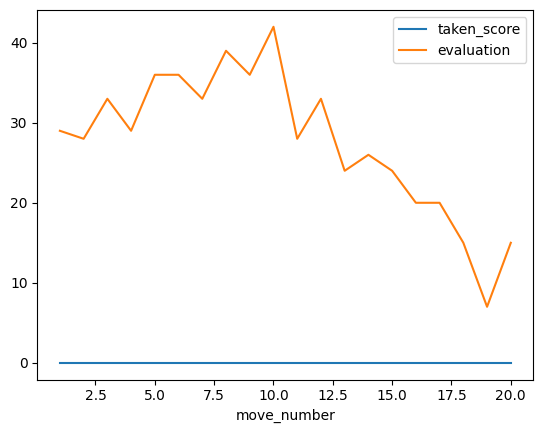

In [166]:
moves[['taken_score','evaluation']].plot(kind="line")

<Axes: xlabel='move_number'>

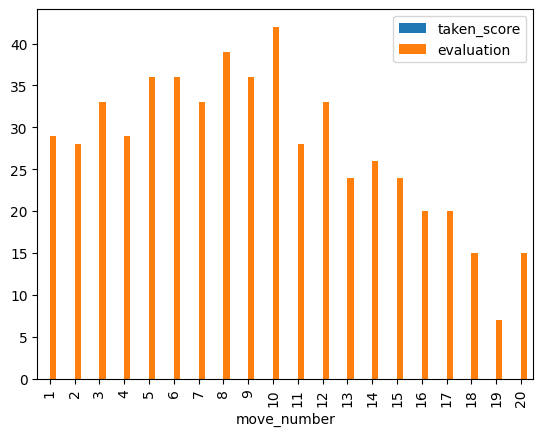

In [167]:
moves[['taken_score','evaluation']].plot(kind="bar")